In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VOs61DmZixH7fIIeGqfyI6i8SlG-SJLsYECHw3DF3fJn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'telelawdisparityanalysis-donotdelete-pr-mj15quhckhdoe4'
object_key = 'DistrictswiseCR_AEdataf_24-25.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)



,Category,States/UT's,Districts,No. of CSCs,Female,Male,Total,General,OBC,SC,ST,Total.1
0,Case Registered,Andaman and Nicobar,Nicobar,5,615,852,1467,557,315,546,49,1467
1,Case Registered,Andaman and Nicobar,North and Middle Andaman,37,765,1114,1879,199,187,1436,57,1879
2,Case Registered,Andaman and Nicobar,South Andaman,31,340,251,591,42,89,430,30,591
3,Case Registered,Andhra Pradesh,Alluri Sitharama Raju,430,6370,6828,13198,3585,4660,3176,1777,13198
4,Case Registered,Andhra Pradesh,Anakapalli,646,6311,6267,12578,3532,4196,4347,503,12578
5,Case Registered,Andhra Pradesh,Anantapur,577,10050,21628,31678,9189,8651,12245,1593,31678
6,Case Registered,Andhra Pradesh,Annamayya,501,2039,1181,3220,1173,776,1118,153,3220
7,Case Registered,Andhra Pradesh,Bapatla,461,1756,1960,3716,1729,680,1120,187,3716
8,Case Registered,Andhra Pradesh,Chittoor,724,24254,12256,36510,19944,8818,7115,633,36510
9,Case Registered,Andhra Pradesh,East Godavari,300,5908,7332,13240,7032,3230,2370,608,13240


In [6]:
# Check column names clearly
print(df_1.columns)

# Rename confusing columns
df_1.rename(columns={
    "States/UT's": "State_UT",
    "No. of CSCs": "CSCs",
    "Total.1": "Total_Caste"
}, inplace=True)

# Check missing values
print("\nMissing values:\n", df_1.isnull().sum())

# Unique categories in "Category"
print("\nCategory values:\n", df_1["Category"].unique())

# Basic stats
df_1.describe()



Index(['Category', 'States/UT's', 'Districts', 'No. of CSCs', 'Female', 'Male',
       'Total', 'General', 'OBC', 'SC', 'ST', 'Total.1'],
      dtype='object')

Missing values:
 Category       0
State_UT       0
Districts      0
CSCs           0
Female         0
Male           0
Total          0
General        0
OBC            0
SC             0
ST             0
Total_Caste    0
dtype: int64

Category values:
 ['Case Registered' 'Total Case Registered' 'Advice Enabled'
 'Total Advice Enabled']


,CSCs,Female,Male,Total,General,OBC,SC,ST,Total_Caste
count,1572.000000,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03
mean,636.132316,1.015027e+04,1.581586e+04,2.596613e+04,6.030291e+03,8.225906e+03,8.219697e+03,3.490233e+03,2.596613e+04
std,8907.104216,1.422710e+05,2.217056e+05,3.639101e+05,8.458425e+04,1.154120e+05,1.152801e+05,4.899153e+04,3.639101e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,100.000000,8.307500e+02,1.292750e+03,2.243250e+03,3.060000e+02,4.557500e+02,4.437500e+02,8.700000e+01,2.243250e+03
50%,248.500000,2.342500e+03,3.713500e+03,6.238000e+03,1.305000e+03,1.637500e+03,1.602500e+03,4.470000e+02,6.238000e+03
75%,470.000000,6.185250e+03,9.239250e+03,1.583775e+04,3.403750e+03,4.688500e+03,4.471250e+03,1.716250e+03,1.583775e+04
max,250000.000000,4.014611e+06,6.247980e+06,1.026259e+07,2.387060e+06,3.252495e+06,3.246025e+06,1.377011e+06,1.026259e+07


In [8]:
# Clean column names if not already done
df_1.rename(columns={
    "States/UT's": "State_UT",
    "No. of CSCs": "CSCs",
    "Total.1": "Total_Caste"
}, inplace=True)

# Create two filtered DataFrames
df_registered = df_1[df_1["Category"] == "Case Registered"].copy()
df_advice = df_1[df_1["Category"] == "Advice Enabled"].copy()

# Reset index for both
df_registered.reset_index(drop=True, inplace=True)
df_advice.reset_index(drop=True, inplace=True)

# Confirm size
print("Case Registered rows:", df_registered.shape)
print("Advice Enabled rows:", df_advice.shape)


Case Registered rows: (785, 12)
Advice Enabled rows: (785, 12)


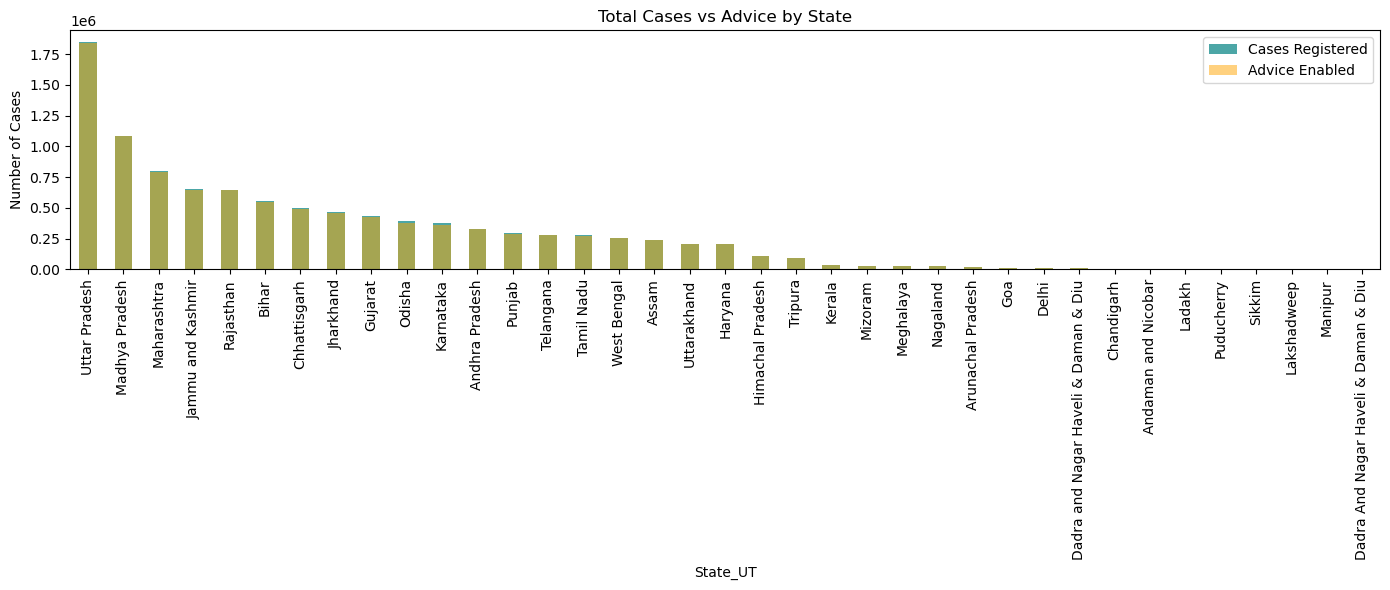

In [9]:
import matplotlib.pyplot as plt

# Group by state
registered_statewise = df_registered.groupby("State_UT")["Total"].sum().sort_values(ascending=False)
advice_statewise = df_advice.groupby("State_UT")["Total"].sum().sort_values(ascending=False)

# Plot side-by-side comparison
plt.figure(figsize=(14,6))
registered_statewise.plot(kind="bar", color="teal", alpha=0.7, label="Cases Registered")
advice_statewise.plot(kind="bar", color="orange", alpha=0.5, label="Advice Enabled")
plt.title("Total Cases vs Advice by State")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


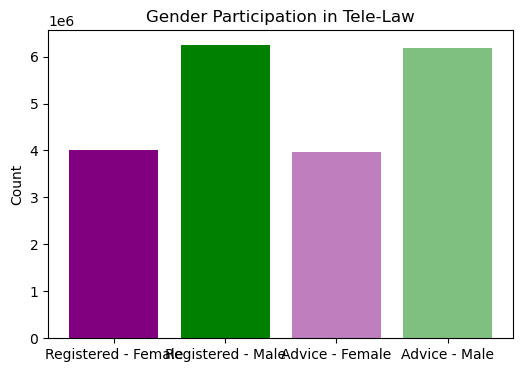

In [10]:
# Gender totals by category
registered_gender = df_registered[["Female", "Male"]].sum()
advice_gender = df_advice[["Female", "Male"]].sum()

# Plot
plt.figure(figsize=(6,4))
plt.bar(["Registered - Female", "Registered - Male"], registered_gender, color=["purple", "green"])
plt.bar(["Advice - Female", "Advice - Male"], advice_gender, color=["purple", "green"], alpha=0.5)
plt.title("Gender Participation in Tele-Law")
plt.ylabel("Count")
plt.show()


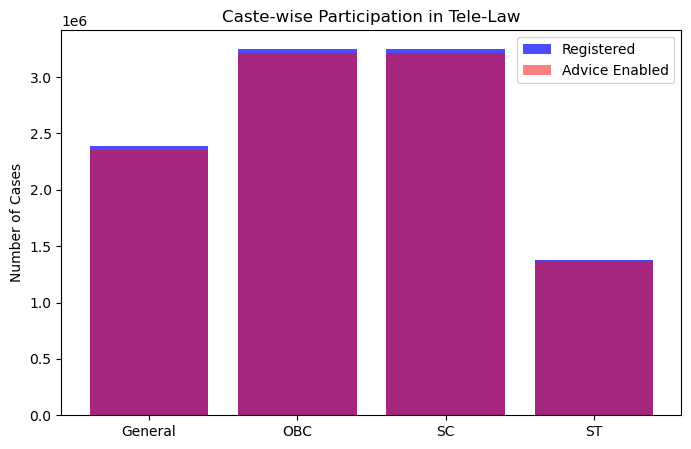

In [11]:
# Group-wise totals for each caste
castes = ["General", "OBC", "SC", "ST"]

registered_caste = df_registered[castes].sum()
advice_caste = df_advice[castes].sum()

# Plot
plt.figure(figsize=(8,5))
plt.bar(castes, registered_caste, label="Registered", color="blue", alpha=0.7)
plt.bar(castes, advice_caste, label="Advice Enabled", color="red", alpha=0.5)
plt.title("Caste-wise Participation in Tele-Law")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()


In [12]:
# Add normalized columns to original data
df_registered["Cases_per_CSC"] = df_registered["Total"] / df_registered["CSCs"]
df_advice["Advice_per_CSC"] = df_advice["Total"] / df_advice["CSCs"]

# Top and bottom 5 districts by normalized usage
print("Top 5 Case Registered (per CSC):")
print(df_registered.sort_values(by="Cases_per_CSC", ascending=False)[["State_UT", "Districts", "Cases_per_CSC"]].head())

print("\nBottom 5 Advice Enabled (per CSC):")
print(df_advice.sort_values(by="Advice_per_CSC", ascending=True)[["State_UT", "Districts", "Advice_per_CSC"]].head())


Top 5 Case Registered (per CSC):
    State_UT   Districts  Cases_per_CSC
166    Delhi   New Delhi         2034.0
165    Delhi        East         1689.0
168    Delhi  North East         1565.0
169    Delhi  North West         1261.0
167    Delhi       North         1180.0

Bottom 5 Advice Enabled (per CSC):
              State_UT     Districts  Advice_per_CSC
440            Manipur    Tengnoupal             0.0
44   Arunachal Pradesh  PakkeKessang             0.0
435            Manipur     Kangpokpi             0.0
46   Arunachal Pradesh      Shi Yomi             0.0
47   Arunachal Pradesh         Siang             0.0


In [14]:
from sklearn.cluster import KMeans

# Only keep necessary columns
cluster_data = df_registered[["State_UT", "Districts", "CSCs", "Total"]].copy()

# Avoid division by zero
cluster_data = cluster_data[cluster_data["CSCs"] > 0]

# Calculate cases per CSC
cluster_data["Cases_per_CSC"] = cluster_data["Total"] / cluster_data["CSCs"]

# Apply KMeans clustering (3 groups: low, medium, high)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data["Cluster"] = kmeans.fit_predict(cluster_data[["Cases_per_CSC"]])

# Sort clusters so that 0 = Low Access, 2 = High Access
cluster_means = cluster_data.groupby("Cluster")["Cases_per_CSC"].mean().sort_values()
access_levels = {cluster: label for cluster, label in zip(cluster_means.index, ["Low Access", "Medium Access", "High Access"])}
cluster_data["Access_Level"] = cluster_data["Cluster"].map(access_levels)

# Show top results
cluster_data[["State_UT", "Districts", "Cases_per_CSC", "Access_Level"]].sort_values("Cases_per_CSC").head(10)


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,State_UT,Districts,Cases_per_CSC,Access_Level
440,Manipur,Tengnoupal,0.0,Low Access
41,Arunachal Pradesh,Lower Siang,0.0,Low Access
44,Arunachal Pradesh,PakkeKessang,0.0,Low Access
46,Arunachal Pradesh,Shi Yomi,0.0,Low Access
434,Manipur,Kamjong,0.0,Low Access
47,Arunachal Pradesh,Siang,0.0,Low Access
158,Chhattisgarh,MohlaManpurAmbagarhChouki,0.0,Low Access
435,Manipur,Kangpokpi,0.0,Low Access
157,Chhattisgarh,ManendragarhChirimiriBharatpur,0.0,Low Access
34,Arunachal Pradesh,Kamle,0.0,Low Access
